In [1]:
pip install pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Loaded 74 total rows from 2 files.
   received packets  IAT_Mean   IAT_Std   IAT_Max   IAT_Min  \
0               510  0.003919  0.003254  0.010874  0.000163   
1               540  0.003701  0.003142  0.010867  0.000163   
2               540  0.003701  0.003211  0.011642  0.000163   
3               550  0.003634  0.003104  0.010017  0.000163   
4               560  0.003569  0.003105  0.010018  0.000163   

   received_addresses  max_pkt_from_sameId  has_attacker  
0                  26                   20             0  
1                  27                   20             0  
2                  29                   20             0  
3                  28                   20             0  
4                  28                   20             0  

Basic Stats:
       received packets   IAT_Mean    IAT_Std    IAT_Max    IAT_Min  \
count         74.000000  74.000000  74.000000  74.000000  74.000000   
mean         544.486486   0.004408   0.004301   0.022944   0.000156   
std  

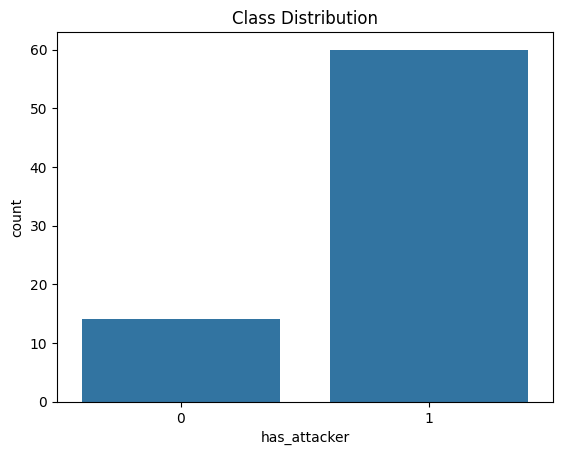


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        19

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23


Confusion Matrix:
[[ 4  0]
 [ 0 19]]


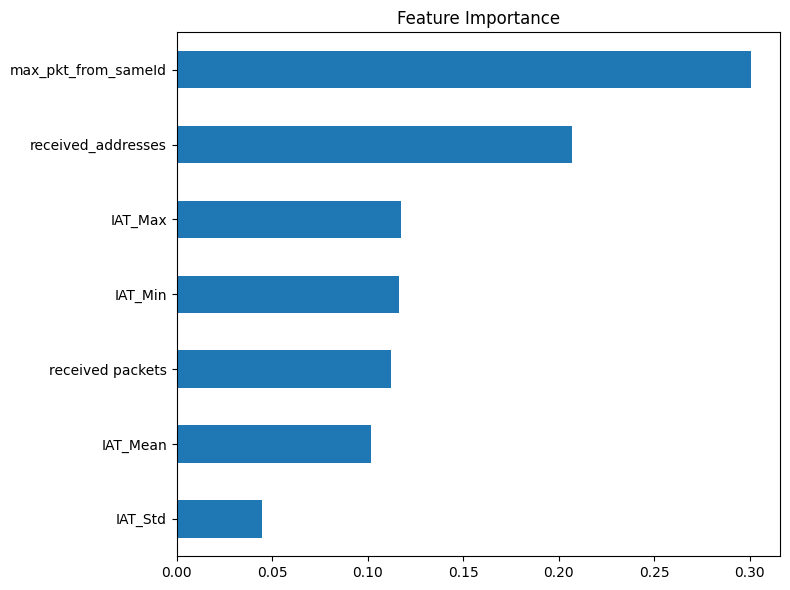

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# === Step 1: List of files to merge ===
# Assuming all files are named like 'Dataset_timewin_1.json', 'Dataset_timewin_2.json', etc.
file_list = [
    'Dataset_timewin_34.json',
    'Dataset_timewin_16.json',

    # Add more filenames as needed
]

# === Step 2: Load and Merge ===
dataframes = []

for file in file_list:
    with open(file, 'r') as f:
        data = [json.loads(line) for line in f]
        df_temp = pd.DataFrame(data)
        dataframes.append(df_temp)

# Concatenate all DataFrames
df = pd.concat(dataframes, ignore_index=True)

print(f"Loaded {len(df)} total rows from {len(file_list)} files.")
print(df.head())


# === Step 2: Exploratory Analysis (Optional) ===
print("\nBasic Stats:")
print(df.describe())

sns.countplot(x='has_attacker', data=df)
plt.title('Class Distribution')
plt.show()

# === Step 3: Preprocessing ===

# Drop columns not needed (if any)
# For now, use all numeric features except the label
X = df.drop(columns=['has_attacker'])
y = df['has_attacker']

# === Step 4: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === Step 5: Train ML Model ===
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 6: Evaluate ===
y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# === Step 7: Feature Importance Plot ===
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Loaded 79 total rows from 4 files.
   received packets  IAT_Mean   IAT_Std   IAT_Max   IAT_Min  \
0               510  0.003919  0.003254  0.010874  0.000163   
1               540  0.003701  0.003142  0.010867  0.000163   
2               540  0.003701  0.003211  0.011642  0.000163   
3               550  0.003634  0.003104  0.010017  0.000163   
4               560  0.003569  0.003105  0.010018  0.000163   

   received_addresses  max_pkt_from_sameId  has_attacker  
0                  26                   20             0  
1                  27                   20             0  
2                  29                   20             0  
3                  28                   20             0  
4                  28                   20             0  

Basic Stats:
       received packets   IAT_Mean    IAT_Std    IAT_Max    IAT_Min  \
count         79.000000  79.000000  79.000000  79.000000  79.000000   
mean         514.215190   0.009920   0.008849   0.041328   0.002624   
std  

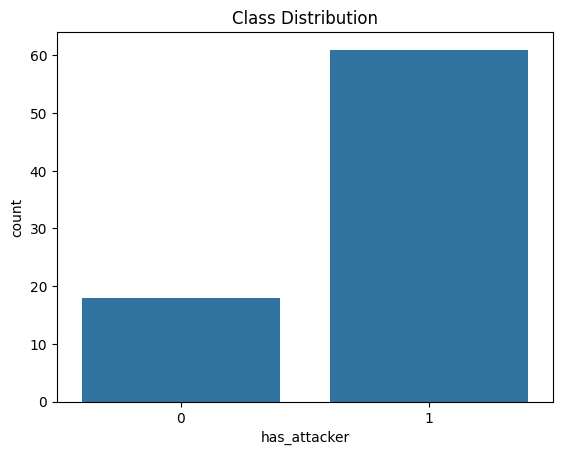


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.95      1.00      0.97        19

    accuracy                           0.96        24
   macro avg       0.97      0.90      0.93        24
weighted avg       0.96      0.96      0.96        24


Confusion Matrix:
[[ 4  1]
 [ 0 19]]


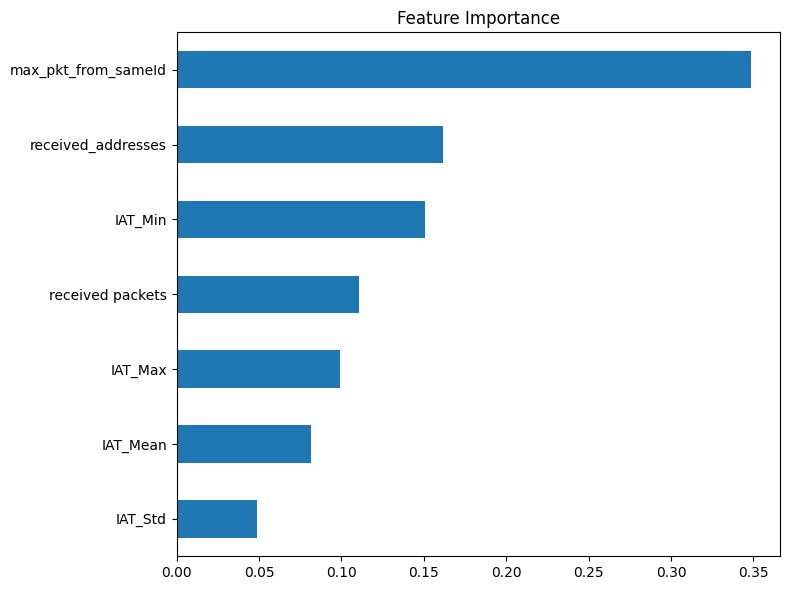

In [3]:
    # 'Dataset_timewin_22.json',
    # 'Dataset_timewin_28.json',
    # 'Dataset_timewin_40.json',
    # 'Dataset_timewin_46.json',
    # 'Dataset_timewin_52.json',
    # 'Dataset_timewin_58.json',
    # 'Dataset_timewin_64.json',
    # 'Dataset_timewin_76.json',
    # 'Dataset_timewin_70.json',
    # 'Dataset_timewin_82.json',
    # 'Dataset_timewin_88.json',
    # 'Dataset_timewin_94.json',
    # 'Dataset_timewin_100.json',
    # 'Dataset_timewin_106.json',
    # 'Dataset_timewin_454.json',
    # 'Dataset_timewin_448.json',
    # 'Dataset_timewin_442.json',
    # 'Dataset_timewin_436.json',
    # 'Dataset_timewin_430.json',
    # 'Dataset_timewin_208.json',
    # 'Dataset_timewin_424.json',
    # 'Dataset_timewin_418.json',
    # 'Dataset_timewin_406.json',
    # 'Dataset_timewin_412.json',
    # 'Dataset_timewin_400.json',
    # 'Dataset_timewin_394.json',
    # 'Dataset_timewin_388.json',
    # 'Dataset_timewin_382.json'

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# === Step 1: List of files to merge ===
# Assuming all files are named like 'Dataset_timewin_1.json', 'Dataset_timewin_2.json', etc.
file_list = [
    'Dataset_timewin_34.json',
    'Dataset_timewin_16.json',
    'Dataset_timewin_466.json',
    'Dataset_timewin_460.json'

    # Add more filenames as needed
]

# === Step 2: Load and Merge ===
dataframes = []

for file in file_list:
    with open(file, 'r') as f:
        data = [json.loads(line) for line in f]
        df_temp = pd.DataFrame(data)
        dataframes.append(df_temp)

# Concatenate all DataFrames
df = pd.concat(dataframes, ignore_index=True)

print(f"Loaded {len(df)} total rows from {len(file_list)} files.")
print(df.head())


# === Step 2: Exploratory Analysis (Optional) ===
print("\nBasic Stats:")
print(df.describe())

sns.countplot(x='has_attacker', data=df)
plt.title('Class Distribution')
plt.show()

# === Step 3: Preprocessing ===

# Drop columns not needed (if any)
# For now, use all numeric features except the label
X = df.drop(columns=['has_attacker'])
y = df['has_attacker']

# === Step 4: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === Step 5: Train ML Model ===
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 6: Evaluate ===
y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# === Step 7: Feature Importance Plot ===
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Loaded 526 total rows from 32 files.
   received packets  IAT_Mean   IAT_Std   IAT_Max   IAT_Min  \
0               510  0.003919  0.003254  0.010874  0.000163   
1               540  0.003701  0.003142  0.010867  0.000163   
2               540  0.003701  0.003211  0.011642  0.000163   
3               550  0.003634  0.003104  0.010017  0.000163   
4               560  0.003569  0.003105  0.010018  0.000163   

   received_addresses  max_pkt_from_sameId  has_attacker  
0                  26                   20             0  
1                  27                   20             0  
2                  29                   20             0  
3                  28                   20             0  
4                  28                   20             0  

Basic Stats:
       received packets    IAT_Mean     IAT_Std     IAT_Max     IAT_Min  \
count        526.000000  526.000000  526.000000  526.000000  526.000000   
mean         384.475285    0.017156    0.011070    0.057180    0.0

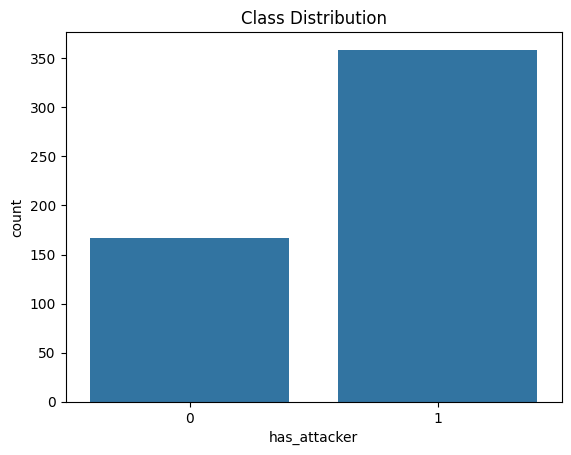


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        50
           1       0.96      0.97      0.97       108

    accuracy                           0.96       158
   macro avg       0.95      0.95      0.95       158
weighted avg       0.96      0.96      0.96       158


Confusion Matrix:
[[ 46   4]
 [  3 105]]


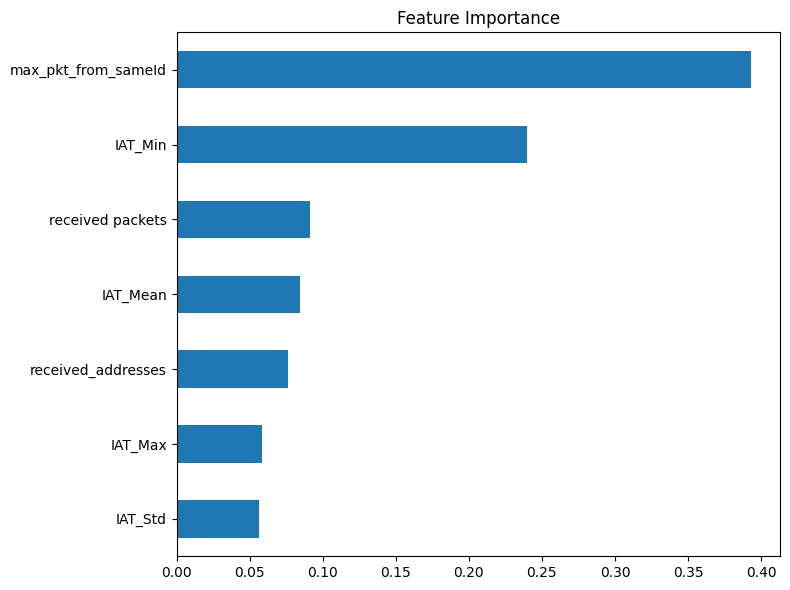

In [4]:


import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# === Step 1: List of files to merge ===
# Assuming all files are named like 'Dataset_timewin_1.json', 'Dataset_timewin_2.json', etc.
file_list = [
    'Dataset_timewin_34.json',
    'Dataset_timewin_16.json',
    'Dataset_timewin_466.json',
    'Dataset_timewin_460.json',
    'Dataset_timewin_88.json',
    'Dataset_timewin_94.json',
    'Dataset_timewin_100.json',
    'Dataset_timewin_106.json',
    'Dataset_timewin_22.json',
    'Dataset_timewin_28.json',
    'Dataset_timewin_40.json',
    'Dataset_timewin_46.json',
    'Dataset_timewin_52.json',
    'Dataset_timewin_58.json',
    'Dataset_timewin_64.json',
    'Dataset_timewin_76.json',
    
    'Dataset_timewin_70.json',
    'Dataset_timewin_82.json',
    'Dataset_timewin_454.json',
    'Dataset_timewin_448.json',
    'Dataset_timewin_442.json',
    'Dataset_timewin_436.json',
    'Dataset_timewin_430.json',
    'Dataset_timewin_208.json',
    'Dataset_timewin_424.json',
    'Dataset_timewin_418.json',
    'Dataset_timewin_406.json',
    'Dataset_timewin_412.json',
    'Dataset_timewin_400.json',
    'Dataset_timewin_394.json',
    'Dataset_timewin_388.json',
    'Dataset_timewin_382.json'

    # Add more filenames as needed
]

# === Step 2: Load and Merge ===
dataframes = []

for file in file_list:
    with open(file, 'r') as f:
        data = [json.loads(line) for line in f]
        df_temp = pd.DataFrame(data)
        dataframes.append(df_temp)

# Concatenate all DataFrames
df = pd.concat(dataframes, ignore_index=True)

print(f"Loaded {len(df)} total rows from {len(file_list)} files.")
print(df.head())


# === Step 2: Exploratory Analysis (Optional) ===
print("\nBasic Stats:")
print(df.describe())

sns.countplot(x='has_attacker', data=df)
plt.title('Class Distribution')
plt.show()

# === Step 3: Preprocessing ===

# Drop columns not needed (if any)
# For now, use all numeric features except the label
X = df.drop(columns=['has_attacker'])
y = df['has_attacker']

# === Step 4: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === Step 5: Train ML Model ===
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 6: Evaluate ===
y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# === Step 7: Feature Importance Plot ===
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Loaded 1306 total rows from 76 files.
   received packets  IAT_Mean   IAT_Std   IAT_Max   IAT_Min  \
0               310  0.006426  0.007678  0.026507  0.000163   
1               370  0.005384  0.006354  0.026507  0.000163   
2               340  0.005859  0.006213  0.026507  0.000762   
3               319  0.006265  0.003860  0.022233  0.000982   
4               400  0.004996  0.003286  0.013821  0.000228   

   received_addresses  max_pkt_from_sameId  has_attacker  
0                  17                   20             0  
1                  19                   20             0  
2                  19                   20             0  
3                  16                   20             0  
4                  21                   20             0  

Basic Stats:
       received packets     IAT_Mean      IAT_Std      IAT_Max      IAT_Min  \
count       1306.000000  1306.000000  1306.000000  1306.000000  1306.000000   
mean         405.489280     0.015782     0.010631     0.0

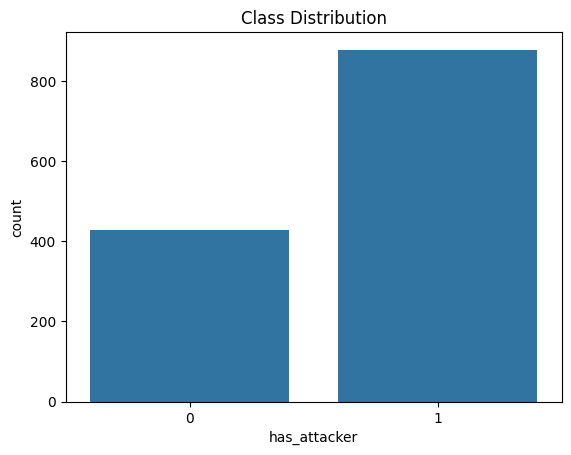

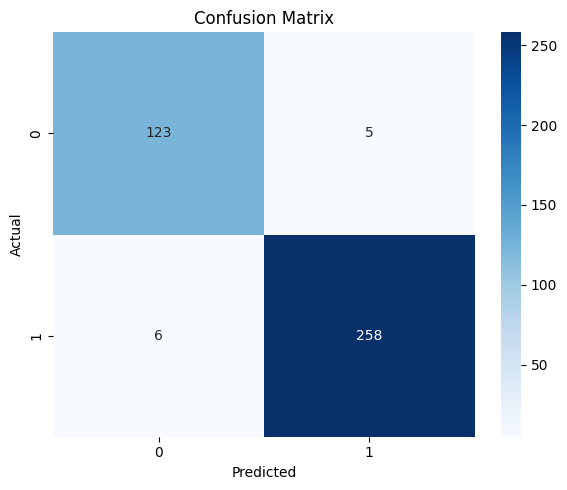


Accuracy Score:  0.9719
Precision Score: 0.9810
Recall Score:    0.9773
F1 Score:        0.9791

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       128
           1       0.98      0.98      0.98       264

    accuracy                           0.97       392
   macro avg       0.97      0.97      0.97       392
weighted avg       0.97      0.97      0.97       392


Confusion Matrix:
[[123   5]
 [  6 258]]


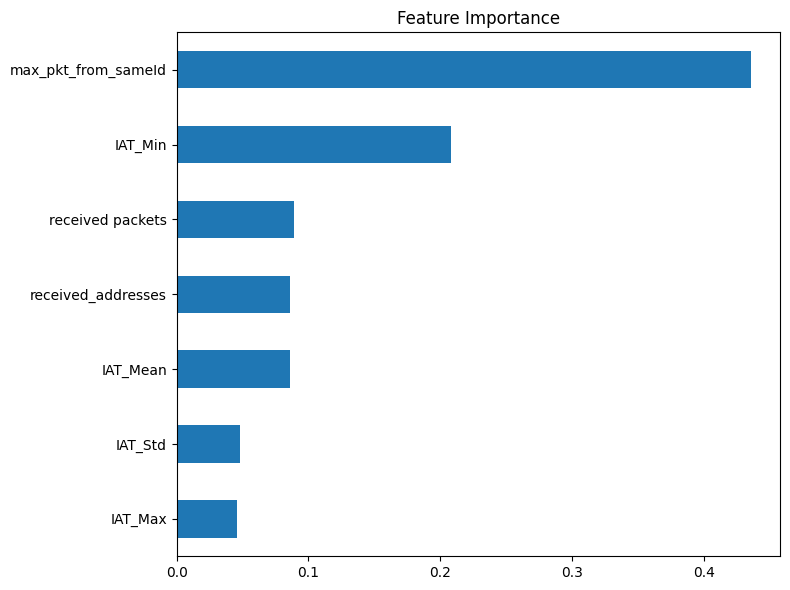

In [6]:
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# === Step 1: List of files to merge ===
# Assuming all files are named like 'Dataset_timewin_1.json', 'Dataset_timewin_2.json', etc.

file_list = glob.glob("Dataset_timewin_*.json")


# === Step 2: Load and Merge ===
dataframes = []

for file in file_list:
    with open(file, 'r') as f:
        data = [json.loads(line) for line in f]
        df_temp = pd.DataFrame(data)
        dataframes.append(df_temp)

# Concatenate all DataFrames
df = pd.concat(dataframes, ignore_index=True)

print(f"Loaded {len(df)} total rows from {len(file_list)} files.")
print(df.head())


# === Step 2: Exploratory Analysis (Optional) ===
print("\nBasic Stats:")
print(df.describe())

sns.countplot(x='has_attacker', data=df)
plt.title('Class Distribution')
plt.show()

# === Step 3: Preprocessing ===

# Drop columns not needed (if any)
# For now, use all numeric features except the label
X = df.drop(columns=['has_attacker'])
y = df['has_attacker']

# === Step 4: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === Step 5: Train ML Model ===
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 6: Evaluate ===
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y.unique())

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# === Accuracy and Other Metrics ===
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"\nAccuracy Score:  {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score:    {recall:.4f}")
print(f"F1 Score:        {f1:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# === Step 7: Feature Importance Plot ===
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()